In [166]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))


%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [252]:
#Load clean_link_main_list_df.csv file
clean_df=pd.read_csv("C:\\Users\\Admin\\clean_link_main_list_df.csv")

In [253]:
# check for missing data
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      612 non-null    int64  
 1   Web_link        612 non-null    object 
 2   Property_Name   612 non-null    object 
 3   price           612 non-null    int64  
 4   no_of_bedrms    612 non-null    int64  
 5   no_of_bathrms   612 non-null    int64  
 6   Floor_Area      612 non-null    int64  
 7   Type            612 non-null    object 
 8   Age             612 non-null    float64
 9   log_price       612 non-null    float64
 10  log_Floor_Area  612 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 52.7+ KB


In [254]:
# remove unwanted columns
clean_df=clean_df.drop( "Unnamed: 0",1)
clean_df.shape

(612, 10)

In [255]:
clean_df = clean_df.loc[clean_df['Floor_Area'] <= 3000,:]

In [256]:
clean_df = clean_df.loc[clean_df['price'] <= 2000000,:]

In [257]:
clean_df.columns

Index(['Web_link', 'Property_Name', 'price', 'no_of_bedrms', 'no_of_bathrms',
       'Floor_Area', 'Type', 'Age', 'log_price', 'log_Floor_Area'],
      dtype='object')

In [258]:
limited_df= clean_df.loc[:,['price', 'no_of_bedrms', 'no_of_bathrms',
       'Floor_Area', 'Age']]
# Less 'Type', log_price', 'log_Floor_Area'

In [259]:
limited_df.describe()

,price,no_of_bedrms,no_of_bathrms,Floor_Area,Age
count,4.770000e+02,477.000000,477.000000,477.000000,477.000000
mean,9.721759e+05,2.553459,1.995807,1028.064990,13.524109
std,4.395943e+05,0.886271,0.695108,371.400713,12.966908
min,2.520000e+05,1.000000,1.000000,344.000000,1.000000
25%,6.200000e+05,2.000000,2.000000,786.000000,5.000000
50%,8.500000e+05,3.000000,2.000000,1001.000000,7.000000
75%,1.280000e+06,3.000000,2.000000,1216.000000,21.000000
max,2.000000e+06,6.000000,5.000000,2700.000000,83.000000


In [260]:
limited_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 610
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          477 non-null    int64  
 1   no_of_bedrms   477 non-null    int64  
 2   no_of_bathrms  477 non-null    int64  
 3   Floor_Area     477 non-null    int64  
 4   Age            477 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 22.4 KB


In [261]:
limited_df.columns

Index(['price', 'no_of_bedrms', 'no_of_bathrms', 'Floor_Area', 'Age'], dtype='object')

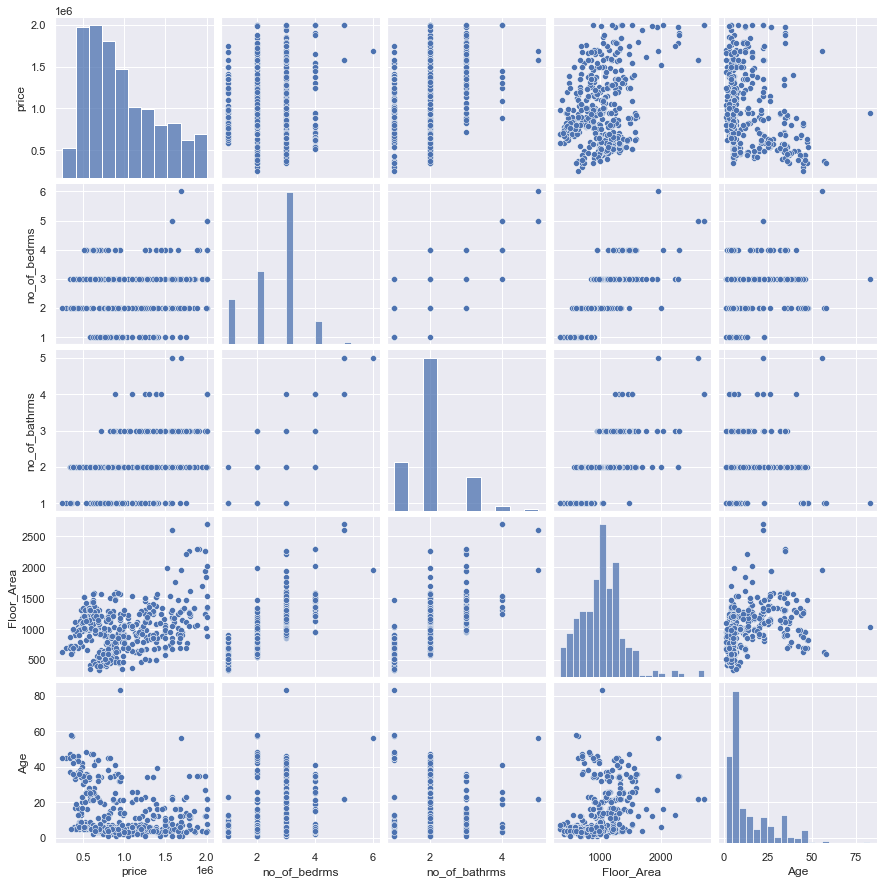

In [262]:
sns.pairplot(limited_df)

#### Setting up for modeling:

In [263]:
#Separate our features from our target

X = limited_df.loc[:,[ 'no_of_bedrms', 'no_of_bathrms', 'Floor_Area', 'Age']]

y = limited_df['price']

# Clone Square of Floor_Area data

X['FA2'] = X['Floor_Area'] ** 2 

In [264]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 610
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no_of_bedrms   477 non-null    int64  
 1   no_of_bathrms  477 non-null    int64  
 2   Floor_Area     477 non-null    int64  
 3   Age            477 non-null    float64
 4   FA2            477 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 22.4 KB


In [265]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [266]:
X_train.columns

Index(['no_of_bedrms', 'no_of_bathrms', 'Floor_Area', 'Age', 'FA2'], dtype='object')

In [267]:
X_train.shape

(285, 5)

In [268]:
X_val.shape

(96, 5)

In [269]:
X_test.shape

(96, 5)

In [270]:
#define columns
columns = [ 'Floor_Area','no_of_bedrms', 'no_of_bathrms',  'Age', 'FA2']

In [271]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 415 to 107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no_of_bedrms   285 non-null    int64  
 1   no_of_bathrms  285 non-null    int64  
 2   Floor_Area     285 non-null    int64  
 3   Age            285 non-null    float64
 4   FA2            285 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 13.4 KB


In [272]:
lasso_model = Lasso(alpha = 100000) # for Feature selection
lasso_model.fit(X_train.loc[:,columns], y_train)

Lasso(alpha=100000)

In [273]:
list(zip(columns, lasso_model.coef_))

[('Floor_Area', 26.224841033385548),
 ('no_of_bedrms', -0.0),
 ('no_of_bathrms', 0.0),
 ('Age', -13193.717557058277),
 ('FA2', 0.2201108532754952)]

In [274]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,columns]
X_train_collinear['Floor_Area Clone'] = (X_train_collinear['Floor_Area'] + 
                                      2500 * np.random.randn(X_train.shape[0]))

X_train_collinear.corr() #notice .95 correlation b/w Lot Area and its "clone"

,Floor_Area,no_of_bedrms,no_of_bathrms,Age,FA2,Floor_Area Clone
Floor_Area,1.000000,0.778779,0.740632,0.363182,0.961086,0.117439
no_of_bedrms,0.778779,1.000000,0.766378,0.287098,0.672422,0.096046
no_of_bathrms,0.740632,0.766378,1.000000,0.103311,0.679651,0.069476
Age,0.363182,0.287098,0.103311,1.000000,0.333613,0.111658
FA2,0.961086,0.672422,0.679651,0.333613,1.000000,0.108382
Floor_Area Clone,0.117439,0.096046,0.069476,0.111658,0.108382,1.000000


As a quick aside, let's understand what happens with p-values when there is a lot of collinearity! We are much less sure about our relationships being meaningful. In this case the model does detect the right variable as having a significant relationship, but this need not be the case in general.

In [276]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     35.07
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.79e-31
Time:                        00:30:20   Log-Likelihood:                -4032.2
No. Observations:                 285   AIC:                             8078.
Df Residuals:                     278   BIC:                             8104.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.422e+05   1.23e+05      5.219      0.000       4e+05    8.84e+05
Floor_Area         858.2218    266.015      3.226      0.001     334.562    1381.881
no_of_bedrms     -3.689e+05   4.41e+04     -8.368      0.000   -4.56e+05   -2.82e+05
no_of_bathrms     2.914e+05   4.69e+04      6.219      0.000    1.99e+05    3.84e+05
Age              -1.096e+04   1752.322     -6.255      0.000   -1.44e+04   -7510.977
FA2                 -0.0278      0.087     -0.319      0.750      -0.200       0.144
Floor_Area Clone     7.2270      8.363      0.864      0.388      -9.236      23.690
==============================================================================
Omnibus:                       15.554   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.029
Skew:                           0.599   Prob(JB):                     0.000201
Kurtosis:                       2.997   Cond. No.                     9.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('Floor_Area', -0.0006352665567463449),
 ('no_of_bedrms', -2.082540040122494e-05),
 ('no_of_bathrms', 1.307971150225782e-05),
 ('Age', -0.0005951529166505926),
 ('FA2', 0.16803274432523704),
 ('Floor_Area Clone', 0.001589980427093771)]

In [278]:
lr_model_lasso = Lasso(alpha = 100000)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('Floor_Area', 14.38460179689479),
 ('no_of_bedrms', -0.0),
 ('no_of_bathrms', 0.0),
 ('Age', -13283.08318244883),
 ('FA2', 0.22323584159963097),
 ('Floor_Area Clone', 6.289159618635888)]

In [279]:
#Back to the original LASSO model: diagnostics

In [280]:
test_set_pred = lasso_model.predict(X_test.loc[:,columns])

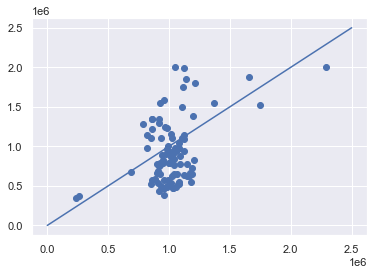

In [287]:
plt.scatter(test_set_pred, y_test,)
plt.plot(np.linspace(0,2500000,1000), np.linspace(0,2500000,1000))

In [285]:
#r-squared
r2_score(y_test, test_set_pred)

0.11825220851201068

In [288]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

322451.5663668618

In [289]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [290]:
## fiting the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [291]:
# apply the scaler to the train set.
X_tr = std.transform(X_train.values)

In [292]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

(array([168.,  40.,  26.,  13.,  24.,  12.,   1.,   0.,   0.,   1.]),
 array([-0.96222598, -0.3335645 ,  0.29509698,  0.92375847,  1.55241995,
         2.18108143,  2.80974291,  3.4384044 ,  4.06706588,  4.69572736,
         5.32438885]),
 <BarContainer object of 10 artists>)

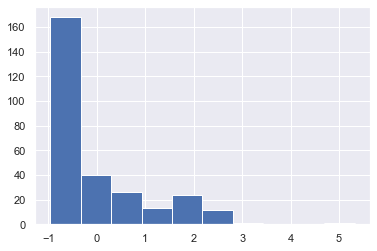

In [294]:
# plot histograms of the transformed variables

plt.hist(X_tr[:,3])

In [295]:
#use LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [296]:


list(zip(X_train.columns, lasso_model.coef_))

[('no_of_bedrms', -264905.08254266734),
 ('no_of_bathrms', 193137.28697285714),
 ('Floor_Area', 219028.26977648892),
 ('Age', -130338.17849583707),
 ('FA2', 27724.06651164319)]

In [297]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

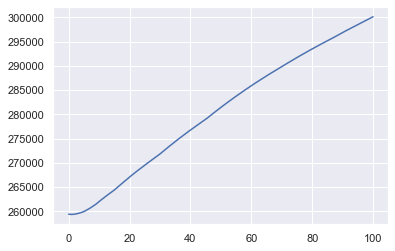

In [299]:
#plot validation error 

plt.plot(alphalist, err_vec_val)

In [301]:
# minimum validation error

np.min(err_vec_val)

259340.2704778918

In [302]:
# alpha min
alphalist[np.argmin(err_vec_val)]

0.9329304026284686

In [333]:
# Data Scaling
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [334]:
#Predictors Scaling for train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [335]:
# Run the cross validation

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [336]:
#  best alpha value
lasso_model.alpha_

100.0

In [337]:
#  refit with best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('no_of_bedrms', -331944.23562280054),
 ('no_of_bathrms', 219245.78544051538),
 ('Floor_Area', 314502.5189165601),
 ('Age', -141472.90279146325),
 ('FA2', -22886.271360297287)]

In [338]:
# predict with the new model
test_set_pred = lasso_model.predict(X_te)

In [339]:
# MAE after using new model
mae(y_test, test_set_pred)

276175.79288955603

In [340]:
# R2 after using new model
r2_score(y_test, test_set_pred)

0.3274162824919895

In [341]:
# Using Ridge Model
alphavec = 10**np.linspace(-2,2,200)

Reg_model = RidgeCV(alphas = alphavec, cv=5)
Reg_model.fit(X_tr, y_train)



RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [342]:
Reg_model.alpha_

5.415871378079471

In [343]:
list(zip(X_train.columns, Reg_model.coef_))

[('no_of_bedrms', -289757.1173827562),
 ('no_of_bathrms', 206030.6282797735),
 ('Floor_Area', 215633.96420525352),
 ('Age', -138309.7947750704),
 ('FA2', 50631.642511765516)]

In [344]:
test_set_pred = Reg_model.predict(X_te)

In [345]:
mae(y_test, test_set_pred)

274473.08208142366

In [346]:
r2_score(y_test, test_set_pred)

0.3313117741542908